# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 3.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
143565,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
84182,0.1099,0.3613,0.3711,0.0049,0.0024,0.0024,0.2612,0.4736,0.1147,0.5762,1,1,11,11
62563,0.0366,0.0024,0.0024,0.0024,0.0049,0.0024,0.1294,0.4590,0.2539,0.7080,5,5,8,8
110561,0.1929,0.1001,0.4102,0.1514,0.0195,0.0562,1.0303,0.8423,0.0806,0.0952,2,2,2,2
147048,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(467777, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467777 entries, 0 to 467776
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          467777 non-null  float64
 1   Emg2          467777 non-null  float64
 2   Emg3          467777 non-null  float64
 3   Emg4          467777 non-null  float64
 4   Emg5          467777 non-null  float64
 5   Emg6          467777 non-null  float64
 6   Emg7          467777 non-null  float64
 7   Emg8          467777 non-null  float64
 8   Emg9          467777 non-null  float64
 9   Emg10         467777 non-null  float64
 10  repetition    467777 non-null  int64  
 11  rerepetition  467777 non-null  int64  
 12  stimulus      467777 non-null  int64  
 13  restimulus    467777 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.0 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000
mean,0.110394,0.093456,0.099184,0.046686,0.013591,0.016319,0.221623,0.281546,0.083071,0.094819,3.153227,2.207094,5.587872,3.993129
std,0.276184,0.220480,0.278285,0.163785,0.057752,0.039971,0.347750,0.423341,0.256250,0.181107,3.482794,3.266631,6.575499,6.231178
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.043900,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.012200,0.002400,0.002400,0.002400,0.002400,0.002400,0.102500,0.122100,0.002400,0.017100,2.000000,0.000000,3.000000,0.000000
75%,0.087900,0.070800,0.017100,0.002400,0.002400,0.007300,0.295400,0.361300,0.009800,0.117200,6.000000,4.000000,10.000000,7.000000
max,4.665500,4.665500,4.162600,4.016100,2.270500,0.791000,4.663100,4.665500,4.523900,2.832000,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     199613
4      15514
8      15513
7      15506
2      15493
12     15490
9      15468
5      15459
6      15456
3      15450
11     15450
1      15442
10     15430
17     10356
13     10343
14     10339
15     10297
16     10268
19      5181
21      5174
18      5169
20      5133
22      5129
23      5104
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

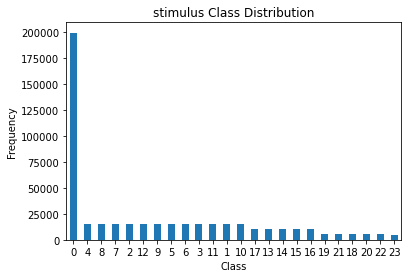

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
221356,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1074,0.0024,0.0024,0,0,0,0
282197,0.0928,0.3955,1.3574,0.0659,0.0024,0.0024,0.0220,0.0977,0.2075,0.0488,9,9,4,4
123136,0.2686,0.1611,0.7251,0.3125,0.0562,0.0684,0.6860,0.9399,0.8838,0.7007,7,7,3,3
262598,0.1953,0.0269,0.0049,0.0024,0.0024,0.0146,0.3101,0.5811,0.0024,0.1172,10,10,2,2
390051,0.0220,0.0024,0.0024,0.0049,0.0024,0.0024,0.0024,0.1172,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(381304, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381304 entries, 0 to 467776
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          381304 non-null  float64
 1   Emg2          381304 non-null  float64
 2   Emg3          381304 non-null  float64
 3   Emg4          381304 non-null  float64
 4   Emg5          381304 non-null  float64
 5   Emg6          381304 non-null  float64
 6   Emg7          381304 non-null  float64
 7   Emg8          381304 non-null  float64
 8   Emg9          381304 non-null  float64
 9   Emg10         381304 non-null  float64
 10  repetition    381304 non-null  int64  
 11  rerepetition  381304 non-null  int64  
 12  stimulus      381304 non-null  int64  
 13  restimulus    381304 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 51.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Dropping Feature 5

In [16]:
drop_list1 = ['Emg5']
X = X.drop(drop_list1,axis = 1 )       
X.head()

,Emg1,Emg2,Emg3,Emg4,Emg6,Emg7,Emg8,Emg9,Emg10
0,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0024,0.0073
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0488,0.0024,0.0073
2,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.0024,0.0122
3,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.0024,0.0098
4,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0562,0.0024,0.0073


In [17]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# XGBoost

In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softmax', n_estimators=1000)
xgb.fit(X_train, y_train)

E:\MachineLearning\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [19]:
y_pred = xgb.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 89.088787191356


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39341
           1       0.89      0.82      0.86      2050
           2       0.88      0.83      0.85      2158
           3       0.84      0.70      0.76      2144
           4       0.93      0.88      0.90      2037
           5       0.88      0.83      0.85      2052
           6       0.90      0.85      0.87      1952
           7       0.76      0.70      0.73      2048
           8       0.87      0.80      0.84      2084
           9       0.85      0.78      0.81      1918
          10       0.84      0.75      0.79      2029
          11       0.93      0.85      0.89      1973
          12       0.87      0.72      0.79      2082
          13       0.86      0.85      0.85      1601
          14       0.76      0.70      0.73      1305
          15       0.66      0.64      0.65      1473
          16       0.87      0.80      0.84      1608
 

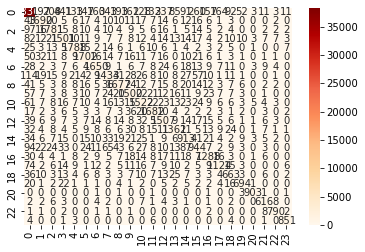

In [21]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

https://analyticsindiamag.com/7-types-classification-algorithms/

https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier

https://www.kaggle.com/michalbrezk/xgboost-classifier-and-hyperparameter-tuning-85

# Evaluation

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8298343845478029
MSE: 9.18870720289532
RMSE: 3.031288043537816


In [23]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.8889436103869918
Recall Score :  0.89088787191356
f1_score :  0.8886538605903632
